<a href="https://colab.research.google.com/github/caiociardelli/sphglltools/blob/main/doc/8_Constrained_interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Constrained interpolation

Author: Caio Ciardelli
<br>
<br>
If you use this Jupyter, please, cite the following paper:
<br>
<br>
Ciardelli, C., Bozdağ, E., Peter, D., and van der Lee, S., 2021. SphGLLTools: A toolbox for visualization of large seismic model files based on 3D spectral-element simulations. Computer & Geosciences, submitted.
<br>
<br>

####Polynomial generic interpolation

Although the generic polynomial interpolation based on assembling a linear system of equations can handle an irregular grid, depending on how much uneven the nodes distribution is, it can lead to poor results.
<br>
<br>
There are general methods that can deal with virtually any data set size and distrubution, such as *inverse distance weighting* and *kriging*. Nevertheless, we shall see a very interesting method, presented as an answer on *Stack Exchange* (see the references), which works very well for the particular case in which we have exactly four points in $\mathbb{R}^{3}$: $(x_{00},\,y_{00}\,z_{00}),\,(x_{10},\,y_{10}\,z_{10}),\,(x_{01},\,y_{01}\,z_{01}),\,(x_{11},\,y_{11}\,z_{11})$.
<br>
<br>
Firstly let's see the limitations of the traditional interpolation technique for four grid points:
<br>
<br>
\begin{equation}
  P\,(x,\,y)
  \,=\,a_{00}\,+\,a_{10}\,x\,+\,a_{01}\,y\,+\,a_{11}\,x\,y
\end{equation}
<br>
<br>
where
<br>
<br>
\begin{split}
  P\,(x_{00},\,y_{00})
  \,&=\,a_{00}\,+\,a_{10}\,x_{00}\,+\,a_{01}\,y_{00}\,+\,a_{11}\,x_{00}\,y_{00}
  \,=\,
  z_{00}\\
  P\,(x_{10},\,y_{10})
  \,&=\,a_{00}\,+\,a_{10}\,x_{10}\,+\,a_{01}\,y_{10}\,+\,a_{11}\,x_{10}\,y_{10}
  \,=\,
  z_{10}\\
  P\,(x_{01},\,y_{01})
  \,&=\,a_{01}\,+\,a_{01}\,x_{01}\,+\,a_{01}\,y_{01}\,+\,a_{01}\,x_{01}\,y_{01}
  \,=\,
  z_{01}\\
  P\,(x_{11},\,y_{11})
  \,&=\,a_{11}\,+\,a_{11}\,x_{11}\,+\,a_{11}\,y_{11}\,+\,a_{11}\,x_{11}\,y_{11}
  \,=\,
  z_{11}\\
\end{split}
<br>
<br>
Or, in matrix notation:
<br>
<br>
\begin{equation}
  \underbrace
  {
    \begin{bmatrix}
      1 & x_{00} & y_{00} & x_{00}\,y_{00}\\
      1 & x_{10} & y_{10} & x_{10}\,y_{10}\\
      1 & x_{01} & y_{01} & x_{01}\,y_{01}\\
      1 & x_{11} & y_{11} & x_{11}\,y_{11}\\ 
    \end{bmatrix}
  }_{\displaystyle M}
  .
  \underbrace
  {
    \begin{bmatrix}
      a_{00}\\
      a_{10}\\
      a_{01}\\
      a_{11}
     \end{bmatrix}
  }_{\displaystyle a}
  \,=\,
  \underbrace
  {
    \begin{bmatrix}
      z_{00}\\
      z_{10}\\
      z_{01}\\
      z_{11}
    \end{bmatrix}
  }_{\displaystyle v}
\end{equation}
<br>
<br>
Multiplying both members of the above equation by the inverse of $M$ gives:
<br>
<br>
\begin{equation}
  a
  \,=\,M^{-1}\,v
\end{equation}
<br>
<br>
The above scheme is equivalent to the bilinear interpolation.
<br>
<br>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def cMN (x, y, m, n):
  """
  Returns x to the power of m
  times y to the power of n
  """
  return x ** m * y ** n


def coefficients2D (Xn, Yn, Zn):
  """
  Compute coefficients from the
  data points
  """
  m, n = Zn.shape

  mn = m * n

  M = np.matrix (np.empty ((mn, mn)))
  v = np.matrix (np.reshape (Zn, (mn, 1)))

  r = 0

  for i in range (m):

    for j in range (n):

      c = 0

      for ej in range (n):

        for ei in range (m):

          M[r, c] = cMN (Xn[i, j], Yn[i, j], ei, ej)

          c += 1
      
      r += 1

  return np.array (np.linalg.solve (M, v)).flatten ()


def polyIntp2D (xx, yy, m, n, a):
  """
  Returns the interpolated value at x and y
  """
  Nx, Ny = xx.shape

  zz = np.zeros ((Nx, Ny))

  r = 0

  for j in range (n):

    for i in range (m):

      zz += a[r] * cMN (xx, yy, i, j)

      r += 1

  return zz

In [ ]:
# Set the parameters below

# Nx: number of points in the x direction
# Ny: number of points in the y direction

# Xn: nodes x values for all (y, z) combinations
# Yn: nodes y values for all (x, z) combinations
# Zn: nodes z values for all (x, y) combinations

if __name__ == "__main__":

  Nx = 200
  Ny = 200

  Xn = np.array ([[0.0, 0.8],
                  [0.0, 1.0]])

  Yn = np.array ([[3.0, 3.4],
                  [4.0, 3.5]])

  Zn = np.array ([[3.1, 1.7],
                  [1.3, 1.9]])

In [ ]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

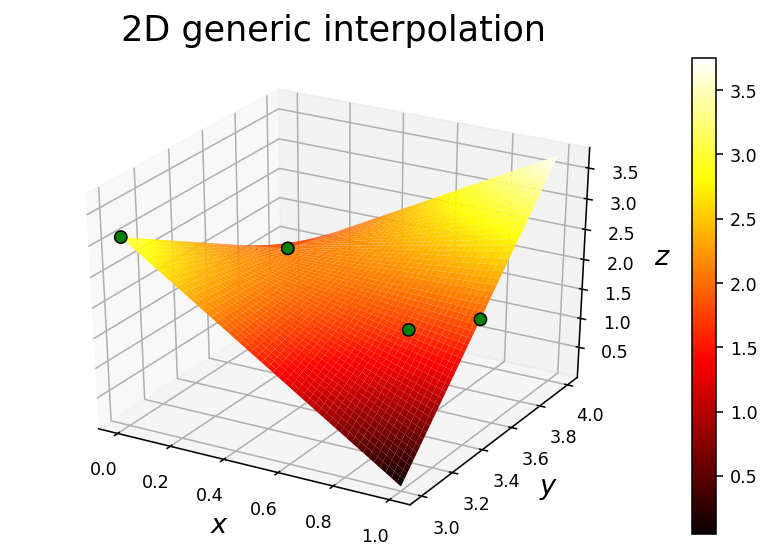

In [ ]:
if __name__ == "__main__":

  m, n = Zn.shape

  xmin = min (Xn.ravel ())
  xmax = max (Xn.ravel ())
  ymin = min (Yn.ravel ())
  ymax = max (Yn.ravel ())

  x = np.linspace (xmin, xmax, Nx)
  y = np.linspace (ymin, ymax, Ny)

  xx, yy = np.meshgrid (x, y)
  
  a  = coefficients2D (Xn, Yn, Zn)
  zz = polyIntp2D (xx, yy, m, n, a)

  vmin = min (zz.ravel ())
  vmax = max (zz.ravel ())

  fig = plt.figure (figsize = (6, 4), dpi = 140)
  ax = fig.gca (projection = '3d')

  surf = ax.plot_surface (xx, yy, zz, cmap = cm.hot,
                          vmin = vmin, vmax = vmax,
                          zorder = 1)

  ax.scatter (Xn, Yn, Zn, marker = 'o', s = 40,
              facecolor = 'green', edgecolor = 'black',
              linewidth = 0.8, alpha = 1, zorder = 2)

  ax.set_xlabel (r'$x$', fontsize = 14)
  ax.set_ylabel (r'$y$', fontsize = 14)
  ax.set_zlabel (r'$z$', fontsize = 14)
  ax.set_zlim (vmin, vmax)
  plt.tick_params (axis = 'x', labelsize = 9)
  plt.tick_params (axis = 'y', labelsize = 9)
  plt.tick_params (axis = 'z', labelsize = 9)
  plt.rcParams['grid.linewidth'] = 0.3
  plt.rcParams['grid.linestyle'] = 'dashed'
  plt.title ('2D generic interpolation', fontsize = 18, y = 1.1)
  cbar = plt.colorbar (surf)
  cbar.ax.tick_params (labelsize = 9)

  plt.subplots_adjust (left = 0.05, bottom = 0.05, top = 0.9, right = 1.0)

  plt.show ()


####Polynomial constrained interpolation

The relative proximity of the two nodes on the right side forces the surface to twist to accommodate all the points using the only second-degree term: $x\,y$.
<br>
<br>
The suggested way to fix this issue is completing the polynomial with the two remaining coefficients of degree two $x^2$ and $y^2$, providing additional degrees of freedom:
<br>
<br>
\begin{equation}
  P\,(x,\,y)
  \,=\,a_{00}\,+\,a_{10}\,x\,+\,a_{01}\,y
  \,+\,a_{11}\,x\,y\,+\,a_{20}\,x^2\,+\,a_{02}\,y^2
\end{equation}
<br>
<br>
However, the resulting system is undetermined as it has more unknowns than equations:
<br>
<br>
\begin{equation}
  \underbrace
  {
    \begin{bmatrix}
      1 & x_{00} & y_{00} & x_{00}\,y_{00} & x_{00}^2 & y_{00}^2\\
      1 & x_{10} & y_{10} & x_{10}\,y_{10} & x_{10}^2 & y_{10}^2\\
      1 & x_{01} & y_{01} & x_{01}\,y_{01} & x_{01}^2 & y_{01}^2\\
      1 & x_{11} & y_{11} & x_{11}\,y_{11} & x_{11}^2 & y_{11}^2\\
    \end{bmatrix}
  }_{\displaystyle M}
  .
  \underbrace
  {
    \begin{bmatrix}
      a_{00}\\
      a_{10}\\
      a_{01}\\
      a_{11}\\
      a_{20}\\
      a_{02}
     \end{bmatrix}
  }_{\displaystyle a}
  \,=\,
  \underbrace
  {
    \begin{bmatrix}
      z_{00}\\
      z_{10}\\
      z_{01}\\
      z_{11}
    \end{bmatrix}
  }_{\displaystyle v}
\end{equation}
<br>
<br>
Since there are infinitely many surfaces in the above form that contains all the four points, a reasonable idea would be choosing the one with minimum curvature. By imposing that the quadratic terms are as small as possible, in the case where we have a regular grid, the two extra terms become zero, and we perfectly recover the bilinear interpolation.
<br>
<br>
So, we seek the solution that minimizes $e$, where:
<br>
<br>
\begin{equation}
  e
  \,=\,{a_{11}}^2\,+\,\,{a_{20}}^2\,+\,{a_{02}}^2
  \,=\,a^TE\,a,
\end{equation}
<br>
<br>
where:
<br>
<br>
\begin{equation}
  E
  \,=\,
  \begin{bmatrix}
    0 & 0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 1 & 0 & 0\\
    0 & 0 & 0 & 0 & 1 & 0\\
    0 & 0 & 0 & 0 & 0 & 1
  \end{bmatrix}
\end{equation}
<br>
<br>
By the method of Lagrange multipliers, minimizing $a^TE\,a$ subject to $M\,a\,=\,v$ is equivalent to solving:
<br>
<br>
\begin{equation}
  E\,a\,+\,M^T\lambda
  \,=\,0,\\
  M\,a
  \,=\,v,
\end{equation}
<br>
<br>
where $\lambda$ is a four-element vector of Lagrange multipliers. Equivalently:
<br>
<br>
\begin{equation}
  \begin{bmatrix}
    E & M^T\\
    M & 0
  \end{bmatrix}
  .
  \begin{bmatrix}
    a\\
    \lambda
  \end{bmatrix}
  =
  \begin{bmatrix}
    0\\
    v
  \end{bmatrix}
\end{equation}
<br>
<br>
Or, in the expanded form:
<br>
<br>
\begin{equation}
  \underbrace
  {
    \begin{bmatrix}
      0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1\\
      0 & 0 & 0 & 0 & 0 & 0 & x_{00} & x_{10} & x_{01} & x_{11}\\
      0 & 0 & 0 & 0 & 0 & 0 & y_{00} & y_{10} & y_{01} & y_{11}\\
      0 & 0 & 0 & 1 & 0 & 0 & x_{00}\,y_{00} & x_{10}\,y_{10} & x_{01}\,y_{01} & x_{11}\,y_{11}\\
      0 & 0 & 0 & 0 & 1 & 0 & {x_{00}}^2 & {x_{10}}^2 & {x_{01}}^2 & {x_{11}}^2\\
      0 & 0 & 0 & 0 & 0 & 1 & {y_{00}}^2 & {y_{10}}^2 & {y_{01}}^2 & {y_{11}}^2\\
      1 & x_{00} & y_{00} & x_{00}\,y_{00} & x_{00}^2 & y_{00}^2 & 0 & 0 & 0 & 0\\
      1 & x_{10} & y_{10} & x_{10}\,y_{10} & x_{10}^2 & y_{10}^2 & 0 & 0 & 0 & 0\\
      1 & x_{01} & y_{01} & x_{01}\,y_{01} & x_{01}^2 & y_{01}^2 & 0 & 0 & 0 & 0\\
      1 & x_{11} & y_{11} & x_{11}\,y_{11} & x_{11}^2 & y_{11}^2 & 0 & 0 & 0 & 0
    \end{bmatrix}
  }_{\displaystyle M_C}
  .
 \underbrace
  {
    \begin{bmatrix}
      a_{00}\\
      a_{10}\\
      a_{01}\\
      a_{11}\\
      a_{20}\\
      a_{02}\\
      \lambda_1\\
      \lambda_2\\
      \lambda_3\\
      \lambda_4
     \end{bmatrix}
  }_{\displaystyle a}
  \,=\,
  \underbrace
  {
    \begin{bmatrix}
      0\\
      0\\
      0\\
      0\\
      0\\
      0\\
      z_{00}\\
      z_{10}\\
      z_{01}\\
      z_{11}
    \end{bmatrix}
  }_{\displaystyle v}
\end{equation}
<br>
<br>
Which is a determined linear system whose solution is:
<br>
<br>
\begin{equation}
  a
  \,=\,{M_C}^{-1}\,v
\end{equation}
<br>
<br>

In [ ]:
def coefficientsCs2D (Xn, Yn, Zn):
  """
  Computes constrained coefficients
  from the data points imposing a
  surface with minimum curvature
  """
  m = 2
  n = 2

  mn = m * n

  xn = Xn.flatten ()
  yn = Yn.flatten ()
  zn = Zn.flatten ()

  M = np.matrix (np.zeros ((mn + 6, mn + 6)))
  v = np.matrix (np.reshape (np.append (np.zeros (6), zn), (mn + 6, 1)))

  M[3, 3] = 1
  M[4, 4] = 1
  M[5, 5] = 1

  for r in range (mn):

    M[r + 6, 0] = 1
    M[r + 6, 1] = xn[r]
    M[r + 6, 2] = yn[r]
    M[r + 6, 3] = xn[r] * yn[r]
    M[r + 6, 4] = xn[r] ** 2
    M[r + 6, 5] = yn[r] ** 2

    M[0, r + 6] = M[r + 6, 0]
    M[1, r + 6] = M[r + 6, 1]
    M[2, r + 6] = M[r + 6, 2]
    M[3, r + 6] = M[r + 6, 3]
    M[4, r + 6] = M[r + 6, 4]
    M[5, r + 6] = M[r + 6, 5]

  return np.array (np.linalg.solve (M, v)).flatten ()[:6]


def polyConsIntp2D (xx, yy, a):
  """
  Returns the constrained interpolated
  value at x and y
  """
  return a[0] + a[1] * xx + a[2] * yy\
              + a[3] * xx * yy + a[4] * xx ** 2 + a[5] * yy ** 2

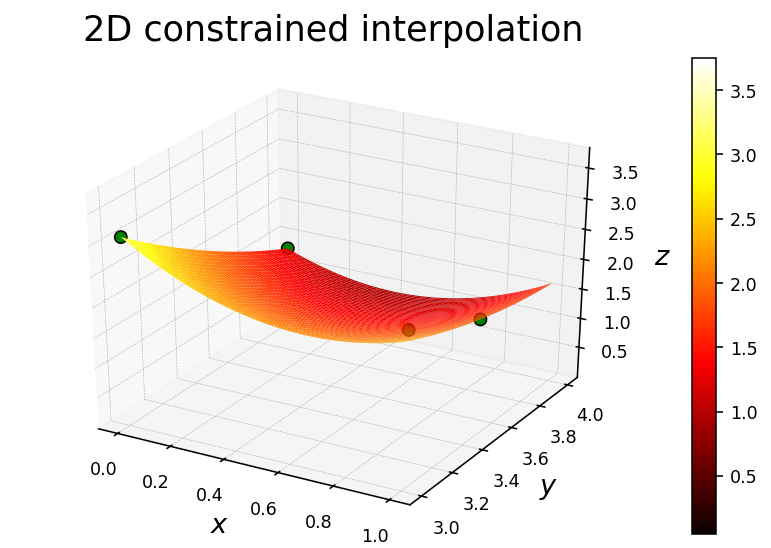

In [ ]:
if __name__ == "__main__":

  m, n = Zn.shape

  xmin = min (Xn.ravel ())
  xmax = max (Xn.ravel ())
  ymin = min (Yn.ravel ())
  ymax = max (Yn.ravel ())

  x = np.linspace (xmin, xmax, Nx)
  y = np.linspace (ymin, ymax, Ny)

  xx, yy = np.meshgrid (x, y)
  
  a  = coefficientsCs2D (Xn, Yn, Zn)
  zz = polyConsIntp2D (xx, yy, a)

  fig = plt.figure (figsize = (6, 4), dpi = 140)
  ax = fig.gca (projection = '3d')

  surf = ax.plot_surface (xx, yy, zz, cmap = cm.hot,
                          vmin = vmin, vmax = vmax,
                          zorder = 1)

  ax.scatter (Xn, Yn, Zn, marker = 'o', s = 40,
              facecolor = 'green', edgecolor = 'black',
              linewidth = 0.8, alpha = 1, zorder = 2)

  ax.set_xlabel (r'$x$', fontsize = 14)
  ax.set_ylabel (r'$y$', fontsize = 14)
  ax.set_zlabel (r'$z$', fontsize = 14)
  ax.set_zlim (vmin, vmax)
  plt.tick_params (axis = 'x', labelsize = 9)
  plt.tick_params (axis = 'y', labelsize = 9)
  plt.tick_params (axis = 'z', labelsize = 9)
  plt.rcParams['grid.linewidth'] = 0.3
  plt.rcParams['grid.linestyle'] = 'dashed'
  plt.title ('2D constrained interpolation', fontsize = 18, y = 1.1)
  cbar = plt.colorbar (surf)
  cbar.ax.tick_params (labelsize = 9)

  plt.subplots_adjust (left = 0.05, bottom = 0.05, top = 0.9, right = 1.0)

  plt.show ()

####References

“Bilinear interpolation.” *Wikipedia*, Wikimedia Foundation, 18 May 2020, https://en.wikipedia.org/wiki/Bilinear_interpolation [Accessed 5 August 2020].
<br>
<br>
“Lagrange multiplier.” *Wikipedia*, Wikimedia Foundation, 24 Jul. 2020, https://en.wikipedia.org/wiki/Lagrange_multiplier [Accessed 6 August 2020].
<br>
<br>
user856, Spatial Interpolation for Irregular Grid, URL (version: 2014-06-13): https://math.stackexchange.com/q/832635 [Accessed 6 August 2020].